# 14R_promoter_promoter
figure 5/17/2021

corresponds to new fig 2F
A. promoter promoter: Basically for a promoter-promoter loop, we want to know if both genes are being expressed in the loop or if one is acting purely as an enhancer and it's own gene is not being expressed


In [1]:
library(tidyverse)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
save_dir = '../data/processed/fig2/'
tissue_P_P_counts_all = read.csv(paste0(save_dir,'tissue_P_P_counts_all.csv' ),
                                stringsAsFactor=F)%>%
    select(-total_P_P)
head(tissue_P_P_counts_all)

,X,both_exp,one_exp,none_exp
,<chr>,<int>,<int>,<int>
1,Airway,943,1165,597
2,Astrocytes,2175,3094,1362
3,Bladder,1986,3093,1604
4,Colon,5248,7829,3895
5,Esophageal,4108,5852,3080
6,GDSD0,2697,4045,2070


In [3]:
tissue_P_P_long = pivot_longer(tissue_P_P_counts_all, -X)
colnames(tissue_P_P_long) = c('tissue','type','count')

Saving 7 x 7 in image



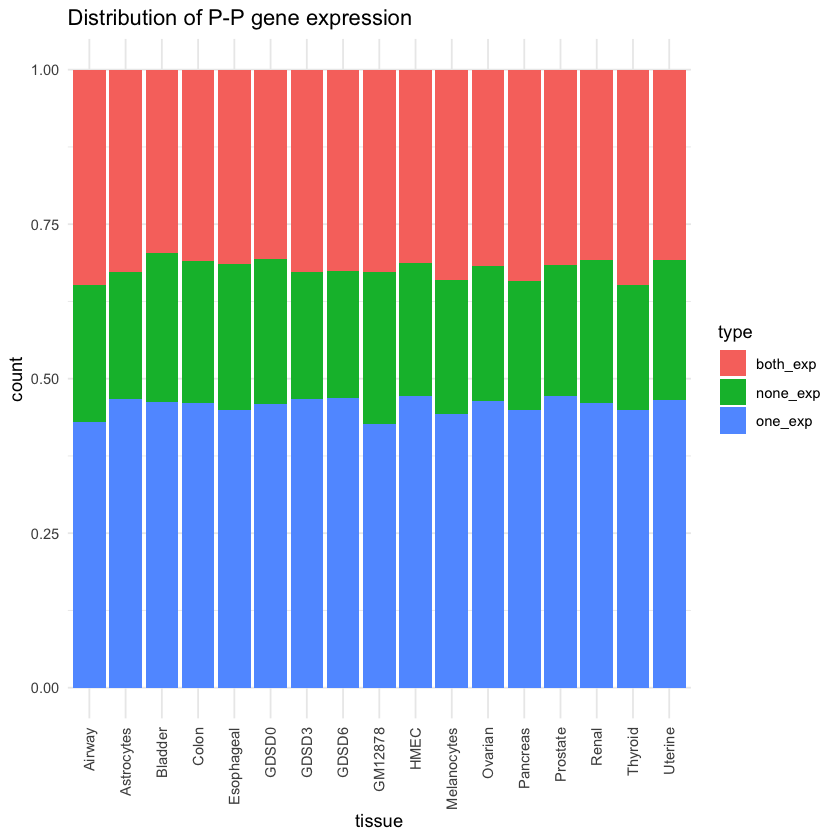

In [4]:
ggplot(tissue_P_P_long, aes(x=tissue, y=count, fill=type))+
    geom_bar(position="fill", stat="identity") +theme_minimal()+ 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    ggtitle('Distribution of P-P gene expression')
ggsave(paste0(save_dir, 'tissue_P_P_dist.pdf'))


look at types

    types:
    1: both promoters are expression
    2: only one promoter is expressed
    3: no promoters are expressed

In [5]:
tissue_P_P_gene_df_all = read.csv(paste0(save_dir,'tissue_P_P_gene_df_all.csv' ),
                                stringsAsFactor=F)%>% select(-X)%>%distinct()
dim(tissue_P_P_gene_df_all)
head(tissue_P_P_gene_df_all)

[1] 97341     4

,gene_1,gene_2,P_P_type,tissue
,<chr>,<chr>,<int>,<chr>
1,GOT1,SLC25A28,1,Airway
2,ENTPD7,SLC25A28,1,Airway
3,CUTC,SLC25A28,1,Airway
4,CUTC,ENTPD7,1,Airway
5,HIF1AN,SCD,1,Airway
6,SCD,SEC31B,2,Airway


In [6]:
tissue_P_P_gene_df_wide = tissue_P_P_gene_df_all%>% 
    pivot_wider(id_cols=c('gene_1','gene_2'), 
                                      names_from='tissue',
                values_from='P_P_type')%>%
    replace(., is.na(.), 0)%>%
    mutate(genes = str_c(gene_1, "::", gene_2))%>%
    select(-gene_1, -gene_2)%>%
    column_to_rownames('genes')

genes_order = rownames(tissue_P_P_gene_df_wide)

In [8]:
tissue_P_P_gene_df_wide%>%
    mutate(all_tissue_P_P_expr = ifelse(apply(tissue_P_P_gene_df_wide == 1, 1, all),
                                        TRUE, FALSE))%>%
    mutate(genes=genes_order)%>%
    filter(all_tissue_P_P_expr)%>%
    separate('genes',c('gene_1','_','gene_2'), sep='[:]')%>%
    arrange(gene_1, gene_2)%>%
    select(gene_1, gene_2)


gene_1,gene_2
<chr>,<chr>
ACTB,FBXL18
AP2S1,SLC1A5
APOO,SAT1
ARL6IP4,MPHOSPH9
C1RL,PHB2
CAPG,GGCX
CAPG,VAMP8
CBL,DPAGT1
CCDC80,GTPBP8
